In [6]:
from typing import TypeVar, List, Dict, Tuple
T = TypeVar("T")

class Graph:

    def __init__(self):
        self._vertices: Dict[T, List[T]] = {}

    def add_edge(self, v: T, u: T) -> None:
        if v not in self._vertices:
            self._vertices[v] = []
        if u not in self._vertices:
            self._vertices[u] = []

        self._vertices[v].append(u)
        self._vertices[u].append(v)

    # get the list of edges for vertex v
    def get_edges(self, v:T):
        return self._vertices[v]
    
    # get a list of the vertices in the graph
    def get_vertices(self) -> List[T]:
        return self._vertices.keys()
    
    def edge_list(self) -> List[Tuple[T,T]]:
        l = []
        for v in self._vertices:
            for e in self._vertices[v]:
                l.append((v, e))
        return l
    
    def __str__(self):
        r = ""
        for u in self.get_vertices():
            r += "{0} --> [".format(u)
            for v in self.get_edges(u):
                r+= "{0}, ".format(v)
            r += '{0}{0}]\n'.format(chr(0x8))
        return r
            


In [8]:
# This is a sample Python script.

# Press Shift+F10 to execute it or replace it with your code.
# Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.
#from webweb import Web    # pip install webweb
#from Graph import Graph


def build_cities_graph():
    cities = Graph()

    cities.add_edge("Seattle", "Chicago")
    cities.add_edge("Seattle", "San Francisco")
    cities.add_edge("San Francisco", "Riverside")
    cities.add_edge("San Francisco", "Los Angeles")
    cities.add_edge("Los Angeles", "Riverside")
    cities.add_edge("Los Angeles", "Phoenix")
    cities.add_edge("Riverside", "Phoenix")
    cities.add_edge("Riverside", "Chicago")
    cities.add_edge("Phoenix", "Dallas")
    cities.add_edge("Phoenix", "Houston")
    cities.add_edge("Dallas", "Chicago")
    cities.add_edge("Dallas", "Atlanta")
    cities.add_edge("Dallas", "Houston")
    cities.add_edge("Houston", "Atlanta")
    cities.add_edge("Houston", "Miami")
    cities.add_edge("Atlanta", "Chicago")
    cities.add_edge("Atlanta", "Washington")
    cities.add_edge("Atlanta", "Miami")
    cities.add_edge("Miami", "Washington")
    cities.add_edge("Chicago", "Detroit")
    cities.add_edge("Detroit", "Boston")
    cities.add_edge("Detroit", "Washington")
    cities.add_edge("Detroit", "New York")
    cities.add_edge("Boston", "New York")
    cities.add_edge("New York", "Philadelphia")
    cities.add_edge("Philadelphia", "Washington")
    cities.add_edge("Boston", "Montreal")
    return cities


# Press the green button in the gutter to run the script.
if __name__ == '__main__':
    g = build_cities_graph()
    print(g.get_vertices())
    edges = g.edge_list()
    #Web(edges).show()


dict_keys(['Seattle', 'Chicago', 'San Francisco', 'Riverside', 'Los Angeles', 'Phoenix', 'Dallas', 'Houston', 'Atlanta', 'Miami', 'Washington', 'Detroit', 'Boston', 'New York', 'Philadelphia', 'Montreal'])


In [9]:
print(g)

Seattle --> [Chicago, San Francisco]
Chicago --> [Seattle, Riverside, Dallas, Atlanta, Detroit]
San Francisco --> [Seattle, Riverside, Los Angeles]
Riverside --> [San Francisco, Los Angeles, Phoenix, Chicago]
Los Angeles --> [San Francisco, Riverside, Phoenix]
Phoenix --> [Los Angeles, Riverside, Dallas, Houston]
Dallas --> [Phoenix, Chicago, Atlanta, Houston]
Houston --> [Phoenix, Dallas, Atlanta, Miami]
Atlanta --> [Dallas, Houston, Chicago, Washington, Miami]
Miami --> [Houston, Atlanta, Washington]
Washington --> [Atlanta, Miami, Detroit, Philadelphia]
Detroit --> [Chicago, Boston, Washington, New York]
Boston --> [Detroit, New York, Montreal]
New York --> [Detroit, Boston, Philadelphia]
Philadelphia --> [New York, Washington]
Montreal --> [Boston]



In [34]:
import graphviz
# conda install graphviz
# conda install python-graphiz

def g2gviz(g: Graph, fn: str) -> None:
    gv = graphviz.Graph(format = 'png', filename = fn)
    edges = g.edge_list()
    nodups = []
    for (u,v) in edges:
        if (v,u) not in nodups:
            nodups.append((u,v))
        
    for (u,v) in nodups:
        gv.edge(u,v)
        
    return gv

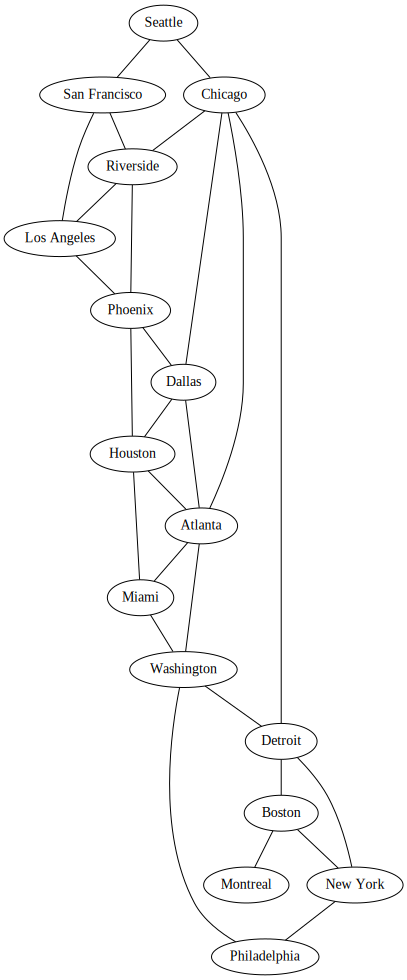

In [33]:
gv = g2gviz(g,'states.png')
gv

In [4]:
def dfs(g: Graph, v:T) -> Tuple[List[T], Dict[T,int], Dict[T, int]]:

    def explore(v:T):
        nonlocal clock # clock is defined in the outer scope
        visited[v] = True
        order.append(v)
        pre[v] = clock
        clock += 1
        
        for e in g.get_edges(v):
            if e not in visited:
                explore(e)
                
        post[v] = clock
        clock += 1

    order = []         
    visited = dict()
    pre = dict()      # prevsit numbers
    post = dict()     # postvisit numbers
    clock = 0         # counter for numbers pre/post visits
    
    explore(v)
    
    for v in g.get_vertices():
        if v not in visited:
            explore(v)
    return order, pre, post

In [5]:
g31 = Graph()   # exercise 3.1 graph 
g31.add_edge('a','b')
g31.add_edge('a','e')
g31.add_edge('b','b')
g31.add_edge('b','e')
g31.add_edge('c','f')
g31.add_edge('e','f')
g31.add_edge('f','i')
g31.add_edge('d', 'g')
g31.add_edge('g', 'h')
g31.add_edge('h', 'd')
order, pre, post = dfs(g31, 'a')
print(order)
print(pre)
print(post)

['a', 'b', 'e', 'f', 'c', 'i', 'd', 'g', 'h']
{'a': 0, 'b': 1, 'e': 2, 'f': 3, 'c': 4, 'i': 6, 'd': 12, 'g': 13, 'h': 14}
{'c': 5, 'i': 7, 'f': 8, 'e': 9, 'b': 10, 'a': 11, 'h': 15, 'g': 16, 'd': 17}


### Adding pre/post order numbering

In [6]:
from typing import List, Tuple, TypeVar
T = TypeVar("T")

def dfs(g: Graph, v:T) -> List[T]:

    def explore(v: T) -> None:
        nonlocal clock
        visited[v] = True
        order.append(v)
        pre[v] = clock
        clock += 1

        for e in g.get_edges(v):
            if not visited[e]:
                edge_to[e] = v
                explore(e)
        post[v] = clock
        clock += 1

    order = []
    visited = {k : False for k in g.get_vertices()}
    pre = {}
    post = {}
    edge_to = {}
    clock = 0
 
    for v in g.get_vertices():
        if not visited[v]:
            explore(v)
    return order, pre, post, edge_to

In [7]:
order, pre, post, edge_to = dfs(g, 'a')

In [8]:
order,pre,post,edge_to

(['Seattle',
  'Chicago',
  'Riverside',
  'San Francisco',
  'Los Angeles',
  'Phoenix',
  'Dallas',
  'Atlanta',
  'Houston',
  'Miami',
  'Washington',
  'Detroit',
  'Boston',
  'New York',
  'Philadelphia',
  'Montreal'],
 {'Seattle': 0,
  'Chicago': 1,
  'Riverside': 2,
  'San Francisco': 3,
  'Los Angeles': 4,
  'Phoenix': 5,
  'Dallas': 6,
  'Atlanta': 7,
  'Houston': 8,
  'Miami': 9,
  'Washington': 10,
  'Detroit': 11,
  'Boston': 12,
  'New York': 13,
  'Philadelphia': 14,
  'Montreal': 17},
 {'Philadelphia': 15,
  'New York': 16,
  'Montreal': 18,
  'Boston': 19,
  'Detroit': 20,
  'Washington': 21,
  'Miami': 22,
  'Houston': 23,
  'Atlanta': 24,
  'Dallas': 25,
  'Phoenix': 26,
  'Los Angeles': 27,
  'San Francisco': 28,
  'Riverside': 29,
  'Chicago': 30,
  'Seattle': 31},
 {'Chicago': 'Seattle',
  'Riverside': 'Chicago',
  'San Francisco': 'Riverside',
  'Los Angeles': 'San Francisco',
  'Phoenix': 'Los Angeles',
  'Dallas': 'Phoenix',
  'Atlanta': 'Dallas',
  'Houston'

In [9]:
def path(edge_to, x:T, y:T):
    s = []
    curr = y
    while curr != x:
        s.append(curr)
        curr = edge_to[curr]
    s.append(x)
    return s


In [10]:
path(edge_to, 'a', 'i')

KeyError: 'i'

## Directed Graphs

In [11]:
class DiGraph(Graph):

    def __init__(self):
        super().__init__()

    def add_edge(self, v:T, u:T):
        if v not in self.get_vertices():
            self._vertices[v] = []
        if u not in self._vertices:
            self._vertices[u] = []

        self._vertices[v].append(u)  # only append in one direction
  

A function to read a file of edges and return the DiGraph

In [12]:
def build_digraph(fn: str) -> DiGraph:
    f = open(fn)
    dg = DiGraph()
    for line in f:
        (u,v) = line.strip().split(' ')
        dg.add_edge(u,v)
    
    return dg


## DFS with Stack

In [13]:
def dfs(g: Graph, v:T):
    order = []
    visited = { }
    s = Stack()
    s.push(v)

    while len(s) > 0:
        curr = s.pop()
        if curr not in visited:
            visited[curr] = True
            order.append(curr)
            for e in g.get_edges(curr):
                if e not in visited:
                    s.push(e)
    return order



## Breadth First Search (BFS)

In [14]:
from collections import deque

def bfs(g: Graph, v:T) -> Tuple[List[T], Dict[T,T]]:
    order = []
    visited = { }
    q = deque()
    q.appendleft(v)
    prev = dict()

    while len(q) > 0:
        curr = q.pop()  # removes right item in queue
        if curr not in visited:
            visited[curr] = True
            order.append(curr)
            for e in g.get_edges(curr):
                if e not in visited:
                    q.appendleft(e)
                    prev[e] = curr
    return order, prev



In [15]:
dg = build_digraph('dg.txt')

In [16]:
order, prev = bfs(dg,'7')

In [17]:
def path(prev: Dict[T,T], x:T, y:T):
    s = []
    curr = y
    while curr != x:
        s.append(curr)
        curr = prev[curr]
    s.append(x)
    return s[::-1]


In [18]:
print(path(prev, '7', '12'))

['7', '9', '11', '12']


In [19]:
prev

{'9': '7',
 '6': '7',
 '10': '9',
 '11': '9',
 '0': '6',
 '8': '6',
 '4': '11',
 '12': '11',
 '1': '0',
 '5': '0',
 '2': '4',
 '3': '2'}

## Exercise - BFS
Do a BFS if the following graph starting at Boston and showing the state of the Queue at each step.

Also show the `prev` dictionary. Assume each city is a layover on a train ride. What path minimizes the number of layovers from Boston to Miami. Use abbreviartions for citinames like Bos, Det, LA

![USA](images/USA-unweighted.png)